In [1]:
from bs4 import BeautifulSoup
import requests
import time, os
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# chromedriver = "/usr/bin/chromedriver" # path to the chromedriver executable
# os.environ["webdriver.chrome.driver"] = chromedriver

In [2]:
url = 'https://www.boxofficemojo.com/brand/?ref_=bo_nb_hm_tab'
response = requests.get(url)
page = response.text

soup = BeautifulSoup(page, 'html5lib')

In [3]:
# driver = webdriver.Chrome(chromedriver)
# driver.get(url)

table = soup.find_all('table')
df = pd.read_html(str(table))[0]
df
# for tr in soup.find_all('tr')[1:]:
#     tds = tr.find_all('td')
#     print( "Title: %s, Total: %s, Email: %s" % \
#           (tds[0].text, tds[1].text, tds[2].text))

,Brand,Total,Releases,#1 Release,Lifetime Gross
0,Marvel Comics,"$14,222,359,290",60,Avengers: Endgame,"$858,373,000"
1,Legendary Pictures,"$6,918,142,562",55,Jurassic World,"$652,270,625"
2,Lucasfilm,"$6,322,540,918",38,Star Wars: Episode VII - The Force Awakens,"$936,662,225"
3,Pixar,"$6,075,570,662",25,Incredibles 2,"$608,581,744"
4,DC Comics,"$5,713,151,081",44,The Dark Knight,"$533,345,358"
5,DreamWorks Animation,"$5,658,603,427",37,Shrek 2,"$441,226,247"
6,Bad Robot,"$3,077,078,931",15,Star Wars: Episode VII - The Force Awakens,"$936,662,225"
7,Vertigo Entertainment,"$3,053,748,082",40,It,"$327,481,748"
8,Walt Disney Animation Studios,"$2,624,970,738",12,Frozen II,"$477,373,578"
9,Illumination Entertainment,"$2,610,640,345",10,The Secret Life of Pets,"$368,384,330"


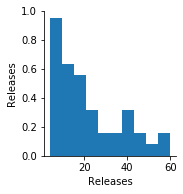

In [4]:
sns.pairplot(df)

In [ ]:
rating_one_hot = pd.get_dummies(df['Brand'])
rating_one_hot

df_ratings = df.merge(rating_one_hot, left_index=True, right_index=True).drop(columns='Brand')
sns.pairplot(df_ratings)